In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

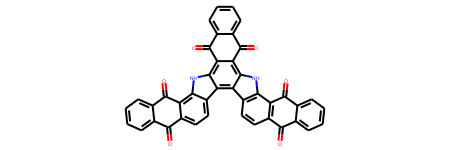

In [2]:
# read in database
df = pd.read_csv('databases/T_AMES_I.csv')

# choose molecule to examine
n=0

# RDKit mol object
m = Chem.MolFromSmiles(df.loc[n]['SMILES'])

m

In [3]:
'''Functional group matching from SMILES string'''

# functional group matching
# prints type of functional group and atoms involved

for x in m.GetSubstructMatches(Chem.MolFromSmarts('c1ccccc1')):
    print(f'aromatic ring: {x}')
    
for x in m.GetSubstructMatches(Chem.MolFromSmarts('c=O')):
    print(f'carbonyl: {x}')

for x in m.GetSubstructMatches(Chem.MolFromSmarts('n1cccc1')):
    print(f'pyrrole: {x}')

aromatic ring: (1, 2, 7, 8, 10, 11)
aromatic ring: (2, 3, 4, 5, 6, 7)
aromatic ring: (10, 11, 12, 13, 14, 15)
aromatic ring: (17, 18, 29, 30, 48, 49)
aromatic ring: (18, 19, 21, 26, 27, 29)
aromatic ring: (21, 22, 23, 24, 25, 26)
aromatic ring: (32, 33, 44, 45, 46, 47)
aromatic ring: (33, 34, 36, 41, 42, 44)
aromatic ring: (36, 37, 38, 39, 40, 41)
carbonyl: (1, 0)
carbonyl: (8, 9)
carbonyl: (19, 20)
carbonyl: (27, 28)
carbonyl: (34, 35)
carbonyl: (42, 43)
pyrrole: (16, 15, 14, 49, 17)
pyrrole: (31, 30, 48, 47, 32)


C:\Users\pope044\AppData\Local\Continuum\anaconda3\envs\chemistry\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


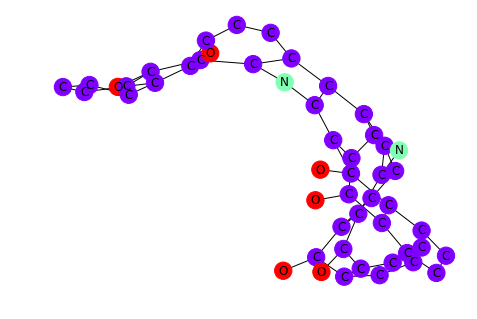

In [4]:
def mol_to_nx(mol):
    '''converts RDKit mol object into a networkx graph'''
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   formal_charge=atom.GetFormalCharge(),
                   chiral_tag=atom.GetChiralTag(),
                   hybridization=atom.GetHybridization(),
                   num_explicit_hs=atom.GetNumExplicitHs(),
                   is_aromatic=atom.GetIsAromatic())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
    return G


G=mol_to_nx(m)

# Color and label image for easier viewing
d = {}
node_list=[]
for node in G.nodes(data=True):
    node_list.append(node[1]['atomic_num'])
    if node[1]['atomic_num'] == 6:
        d[node[0]]='C'
    elif node[1]['atomic_num'] == 8:
        d[node[0]]='O'
    elif node[1]['atomic_num'] == 16:
        d[node[0]]='S'
    elif node[1]['atomic_num'] == 7:
        d[node[0]]='N'
    else:
        d[node[0]]=node[1]['atomic_num']

#plot
pos = nx.spring_layout(G, 0.2, iterations=50)
nx.draw(G, pos, node_color=node_list, cmap=plt.cm.rainbow, labels=d)

In [5]:
def nx_to_mol(G):
    '''converts networkx graph into RDKit mol object'''
    mol = Chem.RWMol()
    atomic_nums = nx.get_node_attributes(G, 'atomic_num')
    chiral_tags = nx.get_node_attributes(G, 'chiral_tag')
    formal_charges = nx.get_node_attributes(G, 'formal_charge')
    node_is_aromatics = nx.get_node_attributes(G, 'is_aromatic')
    node_hybridizations = nx.get_node_attributes(G, 'hybridization')
    num_explicit_hss = nx.get_node_attributes(G, 'num_explicit_hs')
    node_to_idx = {}
    for node in G.nodes():
        a=Chem.Atom(atomic_nums[node])
        a.SetChiralTag(chiral_tags[node])
        a.SetFormalCharge(formal_charges[node])
        a.SetIsAromatic(node_is_aromatics[node])
        a.SetHybridization(node_hybridizations[node])
        a.SetNumExplicitHs(num_explicit_hss[node])
        idx = mol.AddAtom(a)
        node_to_idx[node] = idx

    bond_types = nx.get_edge_attributes(G, 'bond_type')
    for edge in G.edges():
        first, second = edge
        ifirst = node_to_idx[first]
        isecond = node_to_idx[second]
        bond_type = bond_types[first, second]
        mol.AddBond(ifirst, isecond, bond_type)

    Chem.SanitizeMol(mol)
    return mol

mol = nx_to_mol(G)


# checks to ensure mol object is regenerated (same as above)
for x in m.GetSubstructMatches(Chem.MolFromSmarts('c1ccccc1')):
    print(f'aromatic ring: {x}')
    
for x in m.GetSubstructMatches(Chem.MolFromSmarts('c=O')):
    print(f'carbonyl: {x}')

for x in m.GetSubstructMatches(Chem.MolFromSmarts('n1cccc1')):
    print(f'pyrrole: {x}')

aromatic ring: (1, 2, 7, 8, 10, 11)
aromatic ring: (2, 3, 4, 5, 6, 7)
aromatic ring: (10, 11, 12, 13, 14, 15)
aromatic ring: (17, 18, 29, 30, 48, 49)
aromatic ring: (18, 19, 21, 26, 27, 29)
aromatic ring: (21, 22, 23, 24, 25, 26)
aromatic ring: (32, 33, 44, 45, 46, 47)
aromatic ring: (33, 34, 36, 41, 42, 44)
aromatic ring: (36, 37, 38, 39, 40, 41)
carbonyl: (1, 0)
carbonyl: (8, 9)
carbonyl: (19, 20)
carbonyl: (27, 28)
carbonyl: (34, 35)
carbonyl: (42, 43)
pyrrole: (16, 15, 14, 49, 17)
pyrrole: (31, 30, 48, 47, 32)
